In [1]:
import pandas as pd
import numpy as np

In [2]:
cereals = pd.read_csv("Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


## Dropping less relevant columns

In [3]:
cereals.drop(['shelf','weight','cups','rating'], axis=1, inplace=True)
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25


In [4]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [5]:
cereals.isnull().sum()

name        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
dtype: int64

## Decoupling name label

In [6]:
labels = cereals['name']
cereals.drop(['name'], axis=1,inplace=True)

## Imputation

In [7]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer()
mean_imputer.fit(cereals)
cereals = pd.DataFrame(mean_imputer.transform(cereals),
                       columns=cereals.columns)

In [8]:
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
dtype: int64

## Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cereals)
cereals = pd.DataFrame(scaler.transform(cereals),
                       columns=cereals.columns)

In [10]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00


## Agglomerative Clustering
**Parameter description**

n_clusters : The number of clusters to find.

linkage : {“ward”, “complete”, “average”}

ward minimizes the variance of the clusters being merged.

complete uses the maximum distances between all observations of the two sets.

average uses the average of the distances of each observation of the two sets.
affinity : {“euclidean”, “l1”, “l2”, “manhattan”, “cosine”}

Metric used to compute the linkage.



In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(cereals, method='ward', metric='euclidean')

C:\Users\Ram007\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


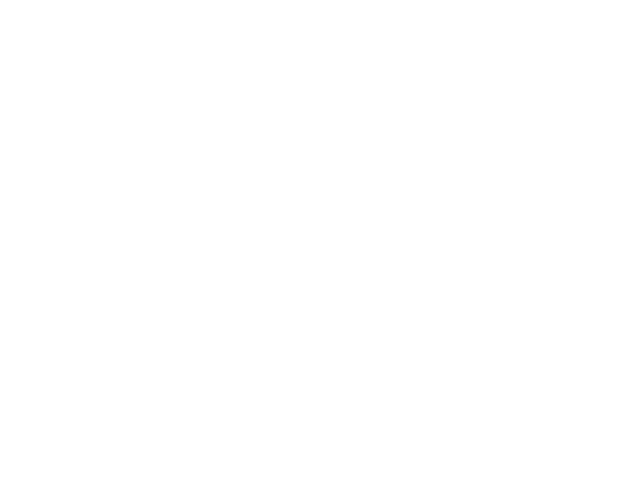

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

dendrogram(linkage_matrix, labels=labels.as_matrix())
plt.tight_layout()
plt.show()

## Implementing 6 clusters

In [13]:
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters=6,
                                affinity='euclidean',
                                linkage='ward')

cluster_predictions = clust.fit_predict(cereals)

result = pd.DataFrame({'Label':labels,
                       'Cluster':cluster_predictions})
result.head()

,Label,Cluster
0,100%_Bran,3
1,100%_Natural_Bran,2
2,All-Bran,3
3,All-Bran_with_Extra_Fiber,3
4,Almond_Delight,2


## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

tol : Relative tolerance with regards to inertia to declare convergence

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids

n_jobs : The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

In [14]:
from sklearn.cluster import KMeans
wss = []
for k in range(2,15):
    km = KMeans(n_clusters=k)
    km.fit(cereals)
    wss.append(km.inertia_)

<IPython.core.display.Javascript object>


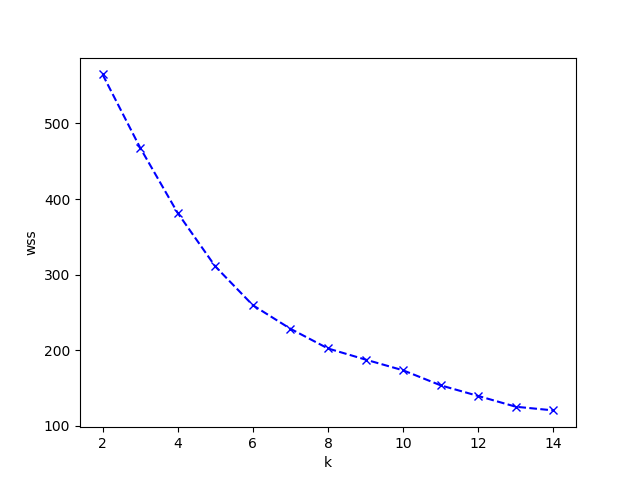

In [15]:
%matplotlib notebook
plt.plot(range(2,15), wss, 'bx--')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

## Kmeans with 6 clusters

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, random_state=4545, n_init=50)
km.fit(cereals)

kmeans_clusters = km.predict(cereals)

result = pd.DataFrame({"Label":labels, "KMeans Cluster":kmeans_clusters})
result.head()

,Label,KMeans Cluster
0,100%_Bran,3
1,100%_Natural_Bran,2
2,All-Bran,3
3,All-Bran_with_Extra_Fiber,3
4,Almond_Delight,1


## Cluster characteristics 

In [17]:
cluster_characteristics = pd.DataFrame(scaler.inverse_transform(km.cluster_centers_),
             columns=cereals.columns)

cluster_characteristics.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,103.333333,2.722222,0.500000,226.666667,1.777778,18.277778,3.388889,77.222222,25.000000
1,110.909091,1.545455,1.045455,170.000000,0.590909,12.500000,11.318182,49.712121,25.000000
2,122.222222,3.333333,2.111111,144.444444,3.150000,13.766813,8.945906,149.722222,22.222222
3,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000
4,116.666667,2.666667,0.833333,208.333333,1.833333,18.166667,6.333333,95.833333,100.000000


## Writing files

In [18]:
result.to_csv("KMeans_Clustering_Output.csv")
cluster_characteristics.to_csv("Cluster_Characteristics.csv")